<img src="logo_UTN.svg" align="right" width="150" /> 

## Teoría de Circuitos II

### Ejercicio 2 TP6

#### Por Grupo 2

# Ejercicio 1

## Consigna

![consigna_ej1](img/consigna.JPG)

### Resolución por método gráfico

![item_a](img/ej1_a.jpeg)

![item_b](img/ej1_b.jpeg)

![item_c](img/ej1_c.jpeg)

![item_d](img/ej1_d.jpeg)

### Resolución por método analítico

![item_a](img/ej1_a_an.jpeg)

![item_b](img/ej1_b_y_c_an.jpeg)

![item_d](img/ej1_d_an.jpeg)

In [2]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (25,15)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor
import numpy as np
import ltspice

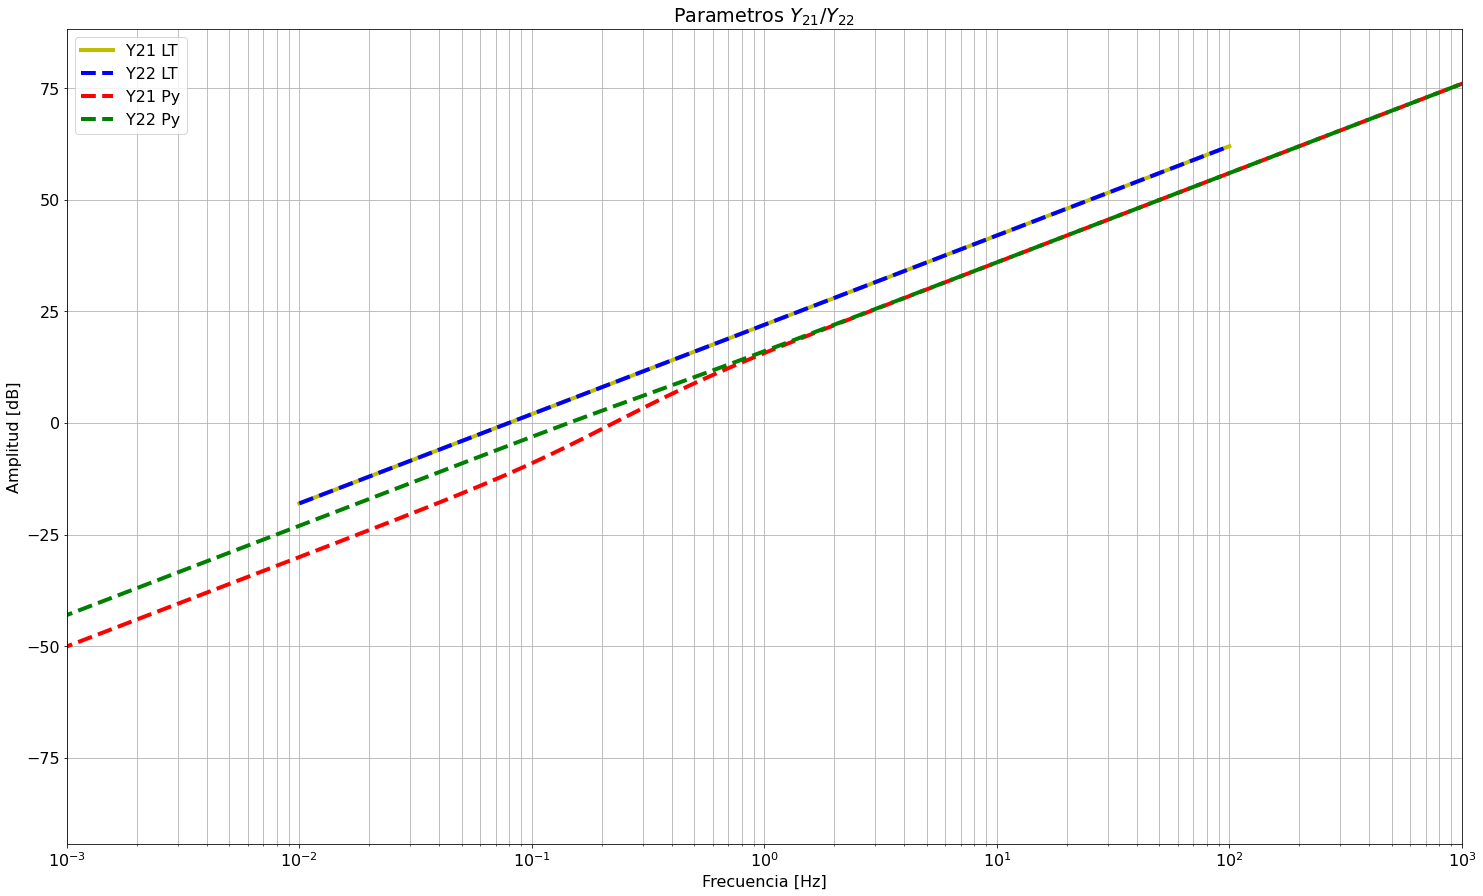

In [9]:
# Importo simulaciones de LTSpice
## EJ1 - A
l = ltspice.Ltspice('sim/ej1_a.raw')
l.parse()

freq = l.get_frequency()
Y21_LT = l.get_data('Y21(v1)')
Y22_LT = l.get_data('Y22(v1)')

fig, ax = plt.subplots(1,1)

ax.grid(visible='true', which='both', axis='both') 
ax.legend(['LTSpice']) 
ax.set_ylabel('Amplitud [dB]') 
ax.set_xlabel('Frecuencia [Hz]') 
ax.set_xlim([0.001, 1000]) 
    
ax.set_title('Parametros $Y_{21}$/$Y_{22}$') 
ax.semilogx(freq, 20 * np.log10(abs(Y21_LT)), 'y',linewidth=4, label='LTSpice Y') 
ax.semilogx(freq, 20 * np.log10(abs(Y22_LT)), 'b--', linewidth=4, label='LTSpice Y') 

# Obtengo respuesta con freqs
num_y21 = np.array([1,1,0])
den_y21 = np.array([1,2])

num_y22 = np.array([1,2.25,0])
den_y22 = np.array([1,2])

w = np.logspace(-4, 4, 1000)

_, Y21_A = sig.freqs(num_y21, den_y21, w)
_, Y22_A = sig.freqs(num_y22, den_y22, w)

ax.semilogx(w / (2*np.pi), 20 * np.log10(abs(Y21_A)), 'r--', linewidth=4, label='Freqs') 
ax.semilogx(w / (2*np.pi), 20 * np.log10(abs(Y22_A)), 'g--', linewidth=4, label='Freqs') 

ax.legend(['Y21 LT', 'Y22 LT', 'Y21 Py', 'Y22 Py']) 

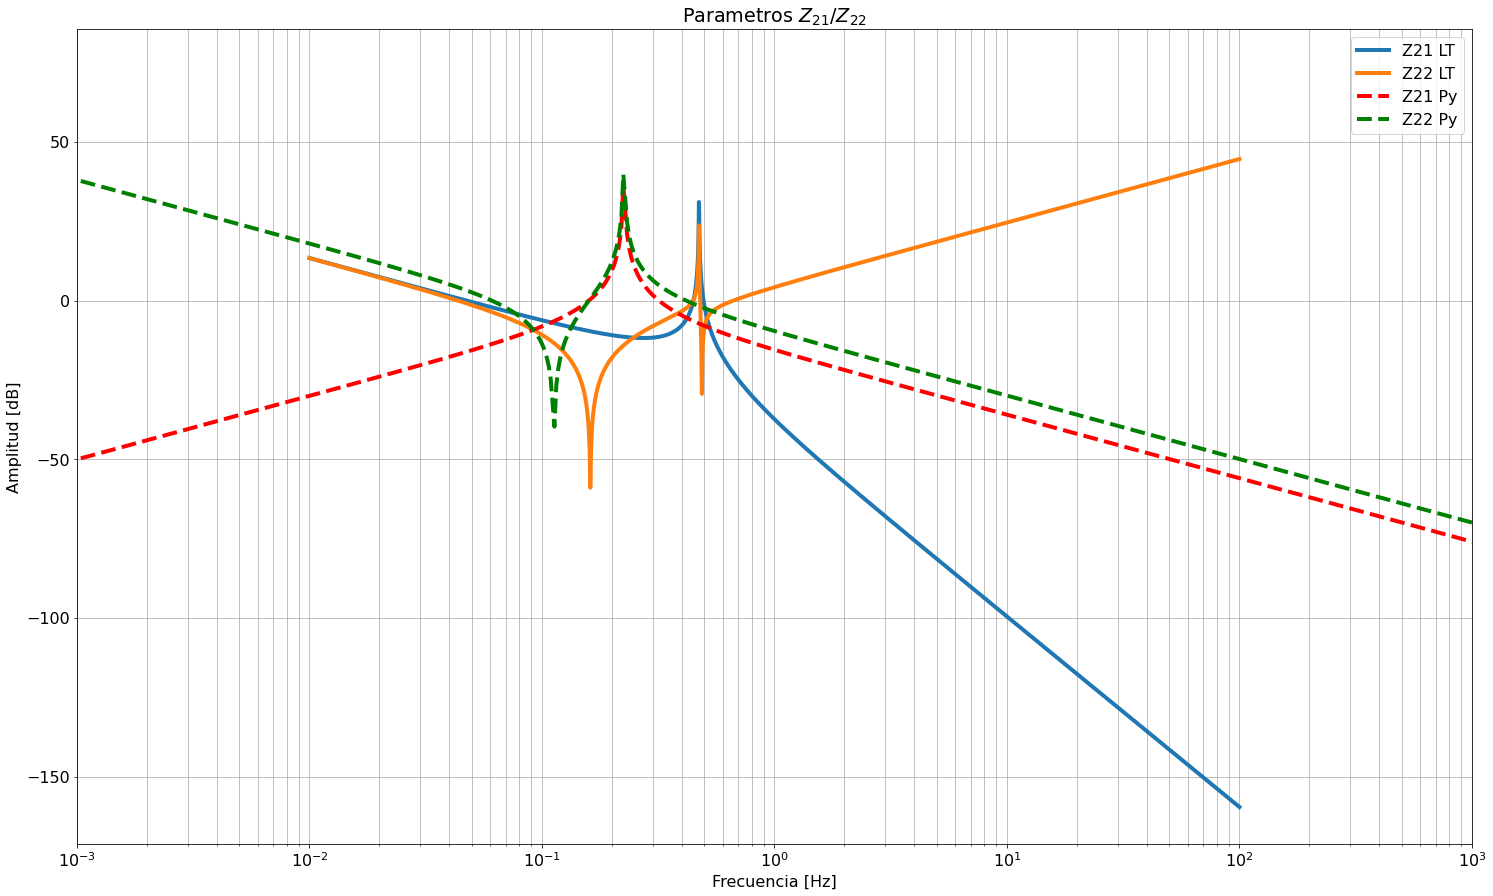

In [11]:
# Importo simulaciones de LTSpice
## EJ1 - B
l = ltspice.Ltspice('sim/ej1_b.raw')
l.parse()

freq = l.get_frequency()
Z21_LT = l.get_data('Z21(v1)')
Z22_LT = l.get_data('Z22(v1)')

fig, ax = plt.subplots(1,1)

ax.grid(visible='true', which='both', axis='both') 
ax.legend(['LTSpice']) 
ax.set_ylabel('Amplitud [dB]') 
ax.set_xlabel('Frecuencia [Hz]') 
ax.set_xlim([0.001, 1000]) 
    
ax.set_title('Parametros $Z_{21}$/$Z_{22}$') 
ax.semilogx(freq, 20 * np.log10(abs(Z21_LT)), linewidth=4, label='LTSpice Z') 
ax.semilogx(freq, 20 * np.log10(abs(Z22_LT)), linewidth=4, label='LTSpice Z') 

# Obtengo respuesta con freqs
num_z21 = np.array([1,0])
den_z21 = np.array([1,0,2])

num_z22 = np.array([2,0,1])
den_z22 = np.array([1,0,2,0])

w = np.logspace(-4, 4, 1000)

_, Z21_A = sig.freqs(num_z21, den_z21, w)
_, Z22_A = sig.freqs(num_z22, den_z22, w)

ax.semilogx(w / (2*np.pi), 20 * np.log10(abs(Z21_A)), 'r--', linewidth=4, label='Freqs') 
ax.semilogx(w / (2*np.pi), 20 * np.log10(abs(Z22_A)), 'g--', linewidth=4, label='Freqs') 

ax.legend(['Z21 LT', 'Z22 LT', 'Z21 Py', 'Z22 Py'])

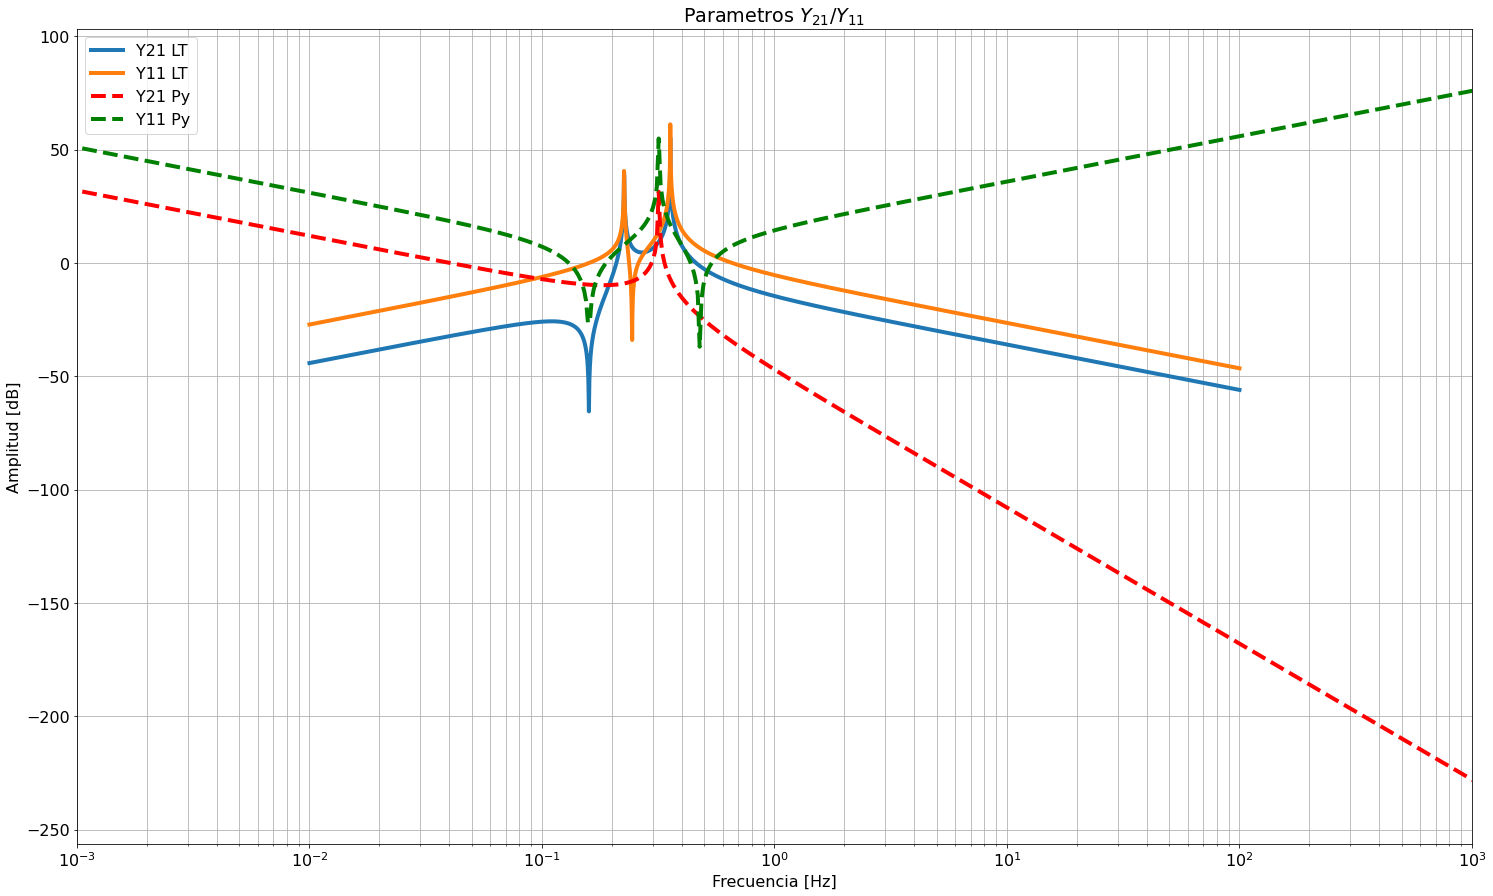

In [12]:
# Importo simulaciones de LTSpice
## EJ1 - C
l = ltspice.Ltspice('sim/ej1_c.raw')
l.parse()

freq = l.get_frequency()
Y21_LT = l.get_data('Y21(v1)')
Y11_LT = l.get_data('Y11(v1)')

fig, ax = plt.subplots(1,1)

ax.grid(visible='true', which='both', axis='both') 
ax.legend(['LTSpice']) 
ax.set_ylabel('Amplitud [dB]') 
ax.set_xlabel('Frecuencia [Hz]') 
ax.set_xlim([0.001, 1000]) 
    
ax.set_title('Parametros $Y_{21}$/$Y_{11}$') 
ax.semilogx(freq, 20 * np.log10(abs(Y21_LT)), linewidth=4, label='LTSpice Y') 
ax.semilogx(freq, 20 * np.log10(abs(Y11_LT)), linewidth=4, label='LTSpice Y') 

# Obtengo respuesta con freqs
num_y21 = np.array([1])
den_y21 = np.array([1,0,4,0])

num_y11 = np.array([1,0,10,0,9])
den_y11 = np.array([1,0,4,0])

w = np.logspace(-4, 4, 1000)

_, Y21_A = sig.freqs(num_y21, den_y21, w)
_, Y11_A = sig.freqs(num_y11, den_y11, w)

ax.semilogx(w / (2*np.pi), 20 * np.log10(abs(Y21_A)), 'r--', linewidth=4, label='Freqs') 
ax.semilogx(w / (2*np.pi), 20 * np.log10(abs(Y11_A)), 'g--', linewidth=4, label='Freqs') 

ax.legend(['Y21 LT', 'Y11 LT', 'Y21 Py', 'Y11 Py'])

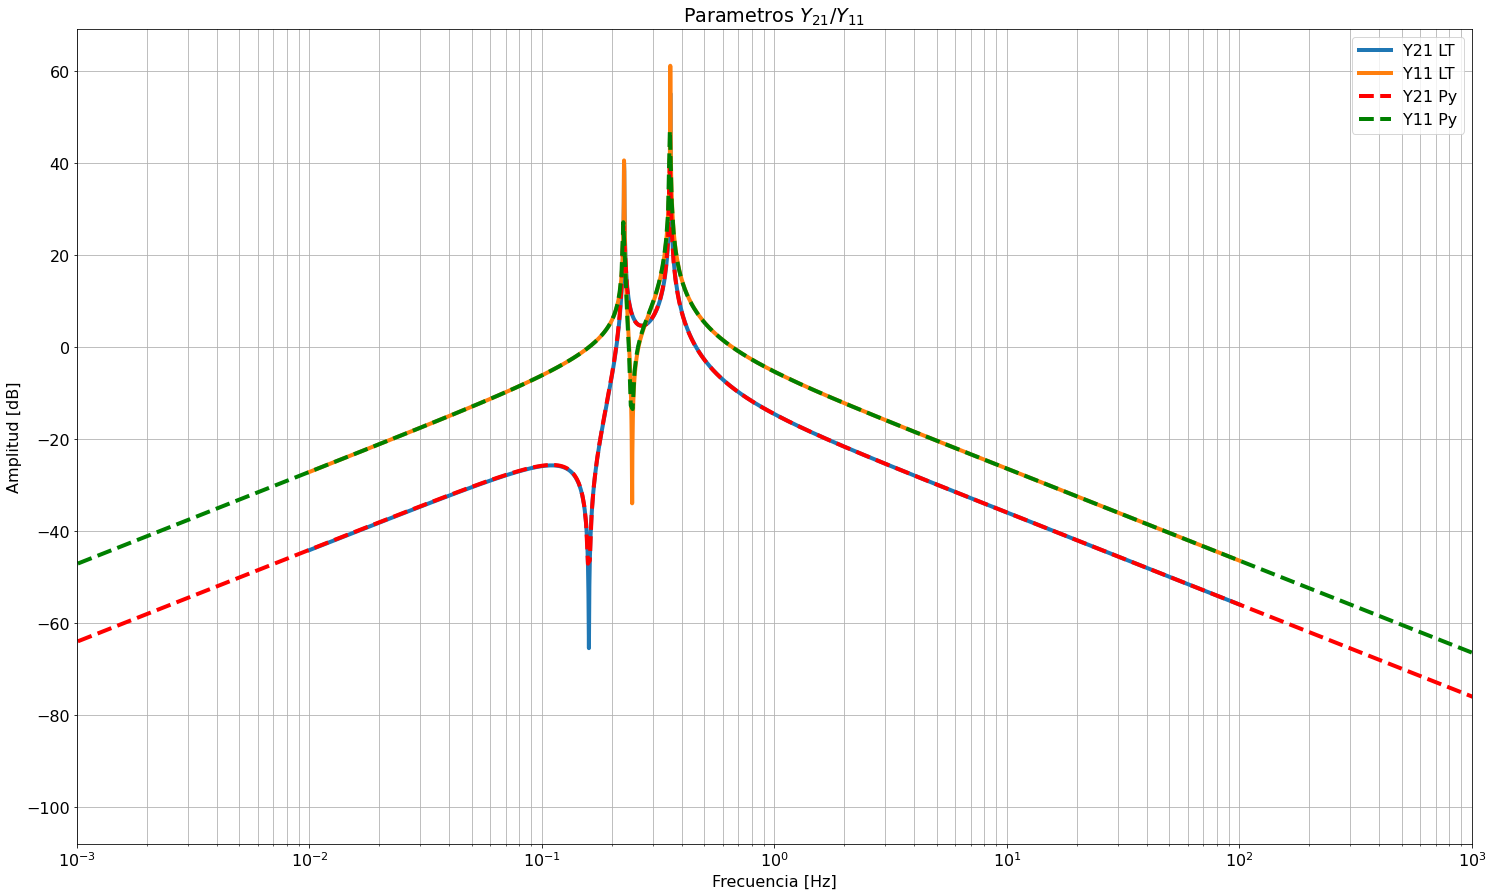

In [13]:
# Importo simulaciones de LTSpice
## EJ1 - D
l = ltspice.Ltspice('sim/ej1_d.raw')
l.parse()

freq = l.get_frequency()
Y21_LT = l.get_data('Y21(v1)')
Y11_LT = l.get_data('Y11(v1)')

fig, ax = plt.subplots(1,1)

ax.grid(visible='true', which='both', axis='both') 
ax.legend(['LTSpice']) 
ax.set_ylabel('Amplitud [dB]') 
ax.set_xlabel('Frecuencia [Hz]') 
ax.set_xlim([0.001, 1000]) 
    
ax.set_title('Parametros $Y_{21}$/$Y_{11}$') 
ax.semilogx(freq, 20 * np.log10(abs(Y21_LT)), linewidth=4, label='LTSpice Y') 
ax.semilogx(freq, 20 * np.log10(abs(Y11_LT)), linewidth=4, label='LTSpice Y') 

# Obtengo respuesta con freqs
num_y21 = np.array([1,0,1,0])
den_y21 = np.array([1,0,7,0,10])

num_y11 = np.array([3,0,7,0])
den_y11 = np.array([1,0,7,0,10])

w = np.logspace(-4, 4, 1000)

_, Y21_A = sig.freqs(num_y21, den_y21, w)
_, Y11_A = sig.freqs(num_y11, den_y11, w)

ax.semilogx(w / (2*np.pi), 20 * np.log10(abs(Y21_A)), 'r--', linewidth=4, label='Freqs') 
ax.semilogx(w / (2*np.pi), 20 * np.log10(abs(Y11_A)), 'g--', linewidth=4, label='Freqs') 

ax.legend(['Y21 LT', 'Y11 LT', 'Y21 Py', 'Y11 Py'])